In [752]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sn

In [753]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [754]:
Data = pd.read_excel('Detection of COVID-19 Infection from Routine Blood Exams_dataset.xlsx')
Data["SESSO"].replace({'M': 0.,'F': 1.}, inplace=True)

In [755]:
def Suprimun_Tnorm(Relation, data):
    ror = np.vstack((Relation, data))
    sup_norm = np.max(np.min(ror, axis=0))
    return sup_norm


def composition(relation , data):
    composed = np.array(list(map(lambda x: list(map(lambda y: Suprimun_Tnorm(relation[x], data[y]),range(data.shape[0]))),range(relation.shape[0]))))
    return composed


def split_by_class(TrainData):
    Data0 = TrainData[TrainData['TARGET']==0]
    target0 = Data0['TARGET']
    Data0 = Data0.drop('TARGET',axis=1)
    # Data0=(Data0-Data0.min())/(Data0.max()-Data0.min())
    Data1 = TrainData[TrainData['TARGET']==1]
    target1 = Data1['TARGET']
    Data1 = Data1.drop('TARGET',axis=1)
    # Data1=(Data1-Data1.min())/(Data1.max()-Data1.min())
    Data2 = TrainData[TrainData['TARGET']==2]
    target2 = Data2['TARGET']
    Data2 = Data2.drop('TARGET',axis=1)
    # Data2=(Data2-Data2.min())/(Data2.max()-Data2.min())
    return Data0 , Data1, Data2 , target0, target1, target2 



In [756]:
#fill misiing values 
imputer= KNNImputer(n_neighbors=4)
Data = imputer.fit_transform(Data[['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET']])
Data = pd.DataFrame(Data, columns = ['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET'])
# Data = pd.concat([Data1, Data2,Data0])




In [757]:
#split to teset and train 
# Dataset1 = PreprocessData.NomalizeData(Data)
Dataset = PreprocessData.TestAndTrain(Data , 80)

TrainData = Dataset[0]
TestData = Dataset[1]
targetTest = TestData['TARGET']
TestData = TestData.drop('TARGET',axis=1)
# TestData=(TestData-TestData.min())/(TestData.max()-TestData.min())

In [758]:
#remove targets from Train Data
trgt = TrainData['TARGET']
TrainData = TrainData.drop('TARGET',axis=1)


In [759]:
lda = LDA(n_components=2)
TrainData = lda.fit_transform(TrainData, trgt)
TestData = lda.transform(TestData)


In [760]:

NewData = pd.DataFrame(TrainData, columns = ['F1','F2'])
NewData = pd.concat([NewData, trgt.rename('TARGET')], axis=1)


# NewData = pd.DataFrame(NewData, columns = ['F1','F1','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15',])



NewData

,F1,F2,TARGET
0,-0.359519,0.535593,2.0
1,0.086034,0.710377,2.0
2,-0.375664,-0.412102,NaN
3,0.637778,0.313952,NaN
4,-2.369236,-1.116627,2.0
...,...,...,...
260,NaN,NaN,0.0
270,NaN,NaN,0.0
248,NaN,NaN,0.0
255,NaN,NaN,0.0


In [761]:
Data0 , Data1, Data2 , target0, target1, target2  = split_by_class(NewData)
    

In [762]:
min0 = Data0.min(axis=0)
max0 = Data0.max(axis=0)
min1 = Data1.min(axis=0)
max1 = Data1.max(axis=0)
min2 = Data2.min(axis=0)
max2 = Data2.max(axis=0)

In [763]:
var0 = np.var(Data0)
var1 = np.var(Data1)
var2 = np.var(Data2)

var0 = np.array(var0)
var1 = np.array(var1)
var2 = np.array(var2)


#method 2 , create similarity matrix based on mean of the class 
avg0 = Data0.mean()
# avg0['SESSO']=0
avg1 = Data1.mean()
# avg1['SESSO']=0
avg2 = Data2.mean()
# avg1['SESSO']=0
avg0 = np.array(avg0)
avg1 = np.array(avg1)
avg2 = np.array(avg2)


In [764]:
avg0

array([-0.39344802,  0.09279239])

In [765]:
avg1

array([0.10560767, 0.05823173])

In [766]:
avg2

array([ 0.05110744, -0.0143039 ])

In [767]:
RelationMatrix =[ avg0,avg1,avg2]
# RelationMatrix =[ var0,var1,var2]

In [768]:
RelationMatrix = np.array(RelationMatrix)

In [786]:
RelationMatrix

array([[-0.39344802,  0.09279239],
       [ 0.10560767,  0.05823173],
       [ 0.05110744, -0.0143039 ]])

In [770]:
RelationMatrix


array([[-0.39344802,  0.09279239],
       [ 0.10560767,  0.05823173],
       [ 0.05110744, -0.0143039 ]])

In [789]:
TestData = np.array(TestData)
SimilarityMatrix = composition(RelationMatrix , TestData)


In [772]:

predict = []
for i in range(SimilarityMatrix.shape[1]):
    a = np.argmax(SimilarityMatrix[:,i])
    predict.append(a)

In [773]:
atcutal= np.array(targetTest)
predict = np.array(predict)

In [779]:
conf3 = confusion_matrix(atcutal, predict )

In [780]:
accuracy_score(atcutal, predict)

0.32142857142857145

In [781]:
#change 3 class to two class , class 0 and class 1
actual1 =np.zeros(len(predict))
pred1 =np.zeros(len(predict))
for i in range(len(predict)):
    if(predict[i] == 2 ):
        pred1[i]=1
    else:
        pred1[i]=predict[i]
    if(atcutal[i]==2):
        actual1[i]=1
    else:
        actual1[i] = atcutal[i]

In [782]:
accuracy_score(actual1, pred1)

0.39285714285714285

In [783]:
conf2=confusion_matrix(actual1, pred1 )

<AxesSubplot:>

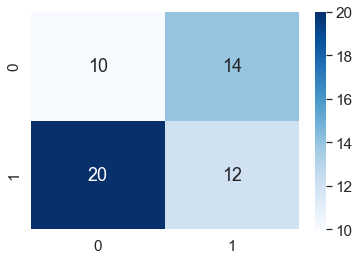

In [784]:

df_cm = pd.DataFrame(conf2, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":18} , cmap='Blues')

<AxesSubplot:>

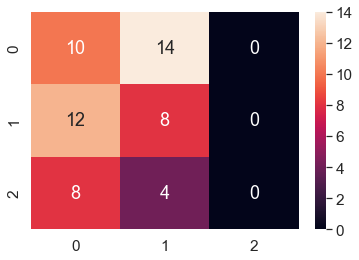

In [785]:
df_cm = pd.DataFrame(conf3, range(3), range(3))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size":18}) # font size